In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['index_dim.csv']))
print(df)

   index_key  uv_index  heat_index  humidity  pressure  windspeed
0       BEN1         1          19        83      1016         21
1       BEN2         1          28        66      1007         20
2       BEN3         1          23        79      1012         21
3       BEN4         1          20        91      1012          9
4       BOM1         7          28        42      1018         11
5       BOM2         8          34        63      1011          7
6       BOM3         6          26        76      1004          9
7       BOM4         6          32        82      1011         14
8       DEL1         1          20        30      1020          6
9       DEL2         1          29        16      1006         11
10      DEL3         1          40        24       992         19
11      DEL4         1          30        70      1006         11
12      HYD1         1          20        83      1016         15
13      HYD2         1          34        38      1003         21
14      HY

In [ ]:
import matplotlib.pyplot as plt

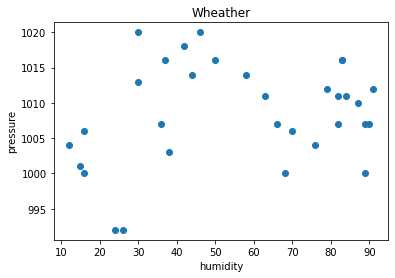

In [ ]:
plt.scatter(df.humidity, df.pressure)
plt.title('Wheather')
plt.xlabel('humidity')
plt.ylabel('pressure')
plt.show()

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['humidity','pressure']])
y_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2,
       2, 0, 1, 2, 0, 1, 1, 1, 0, 0], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,index_key,uv_index,heat_index,humidity,pressure,windspeed,cluster
0,BEN1,1,19,83,1016,21,0
1,BEN2,1,28,66,1007,20,0
2,BEN3,1,23,79,1012,21,0
3,BEN4,1,20,91,1012,9,0
4,BOM1,7,28,42,1018,11,1


<function matplotlib.pyplot.legend(*args, **kwargs)>

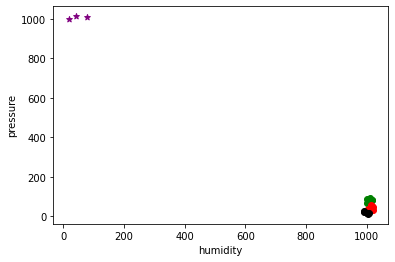

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.pressure,df1.humidity,color='green')
plt.scatter(df2.pressure,df2.humidity,color='red')
plt.scatter(df3.pressure,df3.humidity,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('humidity')
plt.ylabel('pressure')
plt.legend

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['humidity']])
df['humidity'] = scaler.transform(df[['humidity']])
scaler.fit(df[['pressure']])
df['pressure'] = scaler.transform(df[['pressure']])
df.head()

,index_key,uv_index,heat_index,humidity,pressure,windspeed,cluster
0,BEN1,1,19,0.898734,0.857143,21,0
1,BEN2,1,28,0.683544,0.535714,20,0
2,BEN3,1,23,0.848101,0.714286,21,0
3,BEN4,1,20,1.000000,0.714286,9,0
4,BOM1,7,28,0.379747,0.928571,11,1


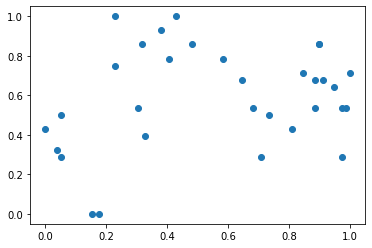

In [ ]:
plt.scatter(df.humidity,df.pressure)